<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

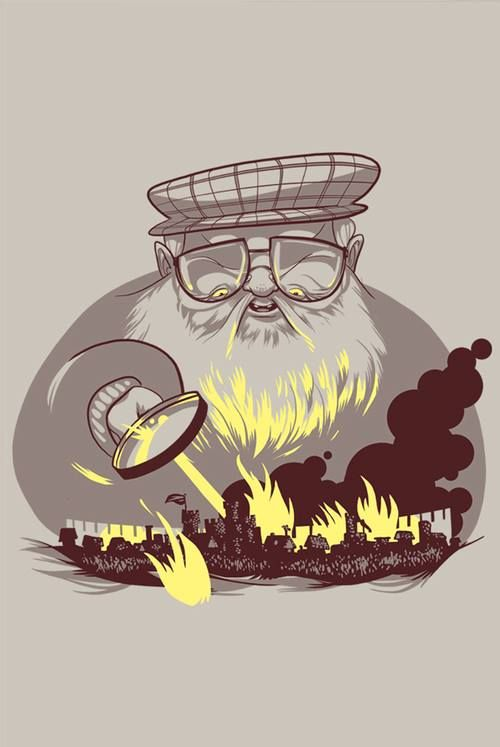

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 74.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 83.3MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
# ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv('/content/game_of_thrones_test.csv', index_col="S.No")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<BarContainer object of 24 artists>

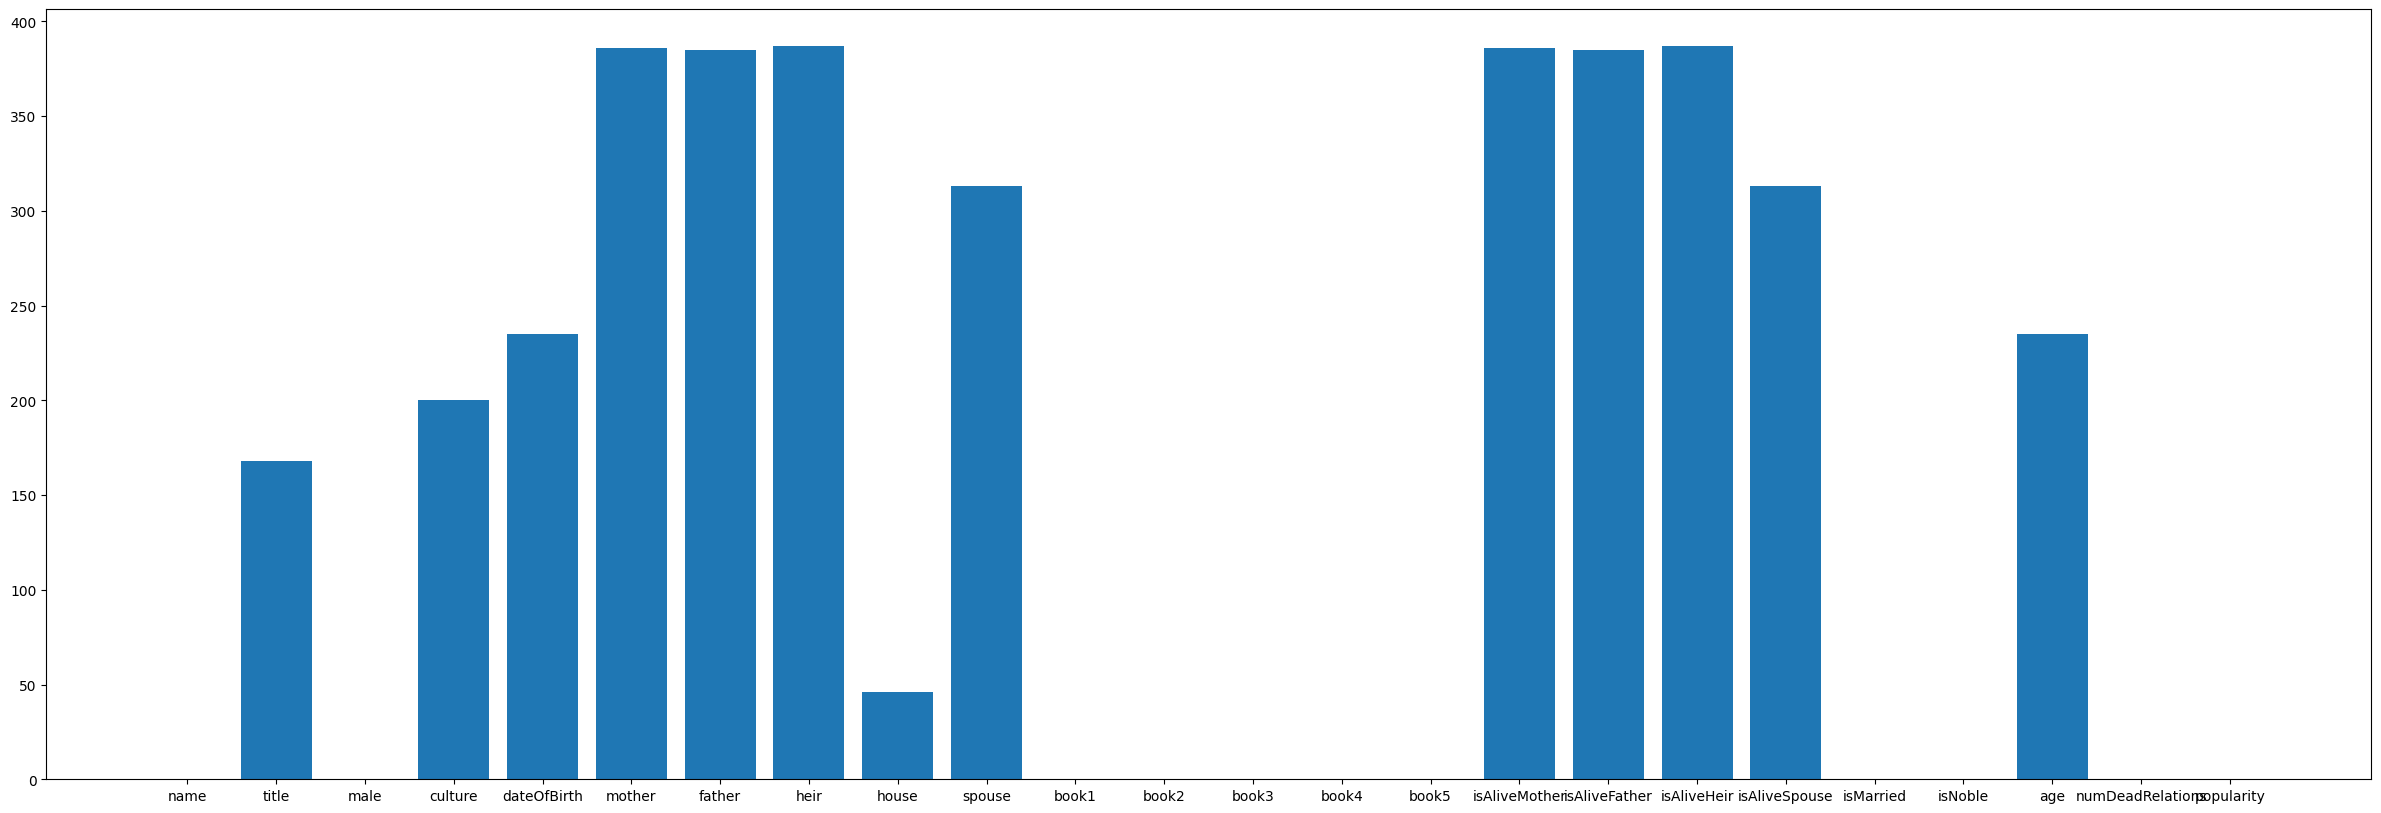

In [ ]:
df = data.isna().sum(axis=0)

plt.figure(figsize=(30,10))

plt.bar(df.index, df.values)

In [ ]:
data.drop(columns=['dateOfBirth', 'mother', 'father', 'heir',
                   'isAliveMother', 'isAliveFather', 'isAliveHeir',
                   'isAliveSpouse', 'spouse', 'age', 'title'], inplace = True)

#data.dropna(subset=['culture'], inplace=True)


In [ ]:
data['culture'] = data['culture'].fillna('other')

In [ ]:
print(len(data))
data.isna().sum(axis=0)

389


,0
name,0
male,0
culture,0
house,46
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
isPopular = []

for i in range(len(data)):
  if data.loc[i, ('popularity')] < 0.3:
    isPopular.append(0)
  else:
    isPopular.append(1)

data_new = pd.concat([data,pd.Series(data=isPopular, name="isPopular")], axis=1)
data = data_new.drop(columns=['popularity'])

boolDeadRelations = []

for i in range(len(data)):
  if data.loc[i, ('numDeadRelations')] > 0:
    boolDeadRelations.append(1)
  else:
    boolDeadRelations.append(0)

data_new = pd.concat([data,pd.Series(data=boolDeadRelations, name="boolDeadRelations")], axis=1)
data = data_new.drop(columns=['numDeadRelations'])

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

cult_names = list(cult)

Cult = []

# цикл, который должен для значений культуры, которые есть в списке для обобщения заменять на ключ,
# а для значений не из списка обощений, добавить значение из столбца значений культуры
c = -1
for i in range(len(data)):

  cult_key = data.loc[i, 'culture'].lower()

  for j in range(len(cult_names)):
    for k in range (len(cult[cult_names[j]])):
      if cult_key == cult[cult_names[j]][k]:
        c = j

  if c > -1:
    Cult.append(cult_names[c])
  else:
    Cult.append(data.loc[i, 'culture'])

  c = -1

data_new = pd.concat([data,pd.Series(data=Cult, name="newCulture")], axis=1)
data = data_new.drop(columns=['culture'])

data.head(5)

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,isPopular,boolDeadRelations,newCulture
0,Melissa Blackwood,0,House Blackwood,0,0,0,0,1,0,0,0,0,other
1,Melisandre,0,R'hllor,0,1,1,1,1,0,0,1,0,Asshai
2,Merrit,0,Brotherhood without banners,0,0,1,1,0,0,0,0,0,other
3,Meryn Trant,1,House Trant,1,1,1,1,1,0,1,0,0,other
4,Merrett Frey,1,House Frey,1,1,1,1,1,1,0,1,0,Riverlands


У меня есть предположение, что из столбца name можно вычленить данные, поэтому я попробую его для этого преобразовать

In [ ]:
list_names = []

for i in range(len(data)):
  words = (data.loc[i, 'name']).split()
  if words[-1][-2:] == 'I)':
    list_names.append(words[-2].lower())
  elif words[-1][-1] == ')' and words[-1][0] == '(':
    list_names.append(words[-2].lower())
  elif words[-1][-1] == ')' and words[-1][0] != '(':
    list_names.append(words[-1].lower()[:-1])
  else:
    list_names.append(words[-1].lower())

In [ ]:
data = pd.concat([data,pd.Series(data=list_names, name="newName")], axis=1)

In [ ]:
new_house = []

for i in range(len(data)):
  if type(data.loc[i, ("house")]) == str:
    check = False
  else:
    check = np.isnan(data.loc[i, ("house")])
  if check == True:
    new_house.append(data.loc[i, 'name'].lower())
  else:
    new_house.append(data.loc[i, 'house'].lower().split()[-1])

data = pd.concat([data,pd.Series(data=new_house, name="newHouse")], axis=1)

In [ ]:
list_house = []

for i in range(len(data)):
  words = (data.loc[i, 'newHouse']).split()
  if words[-1][-1] == ')' and words[-1][0] == '(' and len(words) > 1:
    list_house.append(words[-2].lower())
  elif words[-1][-1] == ')' and words[-1][0] != '(':
    list_house.append(words[-1].lower()[1:-1])
  else:
    list_house.append(words[-1].lower())

len(set(list_house))

data = pd.concat([data,pd.Series(data=list_house, name="newHouse2")], axis=1)

a = data.loc[:, ('newHouse2')].value_counts()
list_others = []
count_diff = list(a)
houses_diff = list(a.index)

for i in range(len(houses_diff)):
  if count_diff[i] > 2:
    list_others.append(houses_diff[i])

list_others.append('other')

list_house2 = []

for i in range(len(data)):
  if data.loc[i, ('newHouse2')] in list_others:
    list_house2.append(data.loc[i, ('newHouse2')])
  else:
    list_house2.append('other')

data = pd.concat([data,pd.Series(data=list_house2, name="newHouse3")], axis=1)

data.drop(columns=['name', 'house', 'newName',	'newHouse',	'newHouse2'], inplace = True)

Для того, чтобы упростить анализ датасета, было принято решение провести перевод категориальных признаков в числа на данном этапе.

Дополнительно замечу, что весь датасет состоит только из категориальных признаков

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['newHouse3'] = label_encoder.fit_transform(data['newHouse3'])
data['newCulture'] = label_encoder.fit_transform(data['newCulture'])

data

,male,book1,book2,book3,book4,book5,isMarried,isNoble,isPopular,boolDeadRelations,newCulture,newHouse3
0,0,0,0,0,0,1,0,0,0,0,36,23
1,0,0,1,1,1,1,0,0,1,0,0,23
2,0,0,0,1,1,0,0,0,0,0,36,1
3,1,1,1,1,1,1,0,1,0,0,36,23
4,1,1,1,1,1,1,1,0,1,0,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
384,1,1,1,1,1,1,0,0,1,0,34,26
385,1,0,1,0,1,1,0,0,0,0,36,5
386,1,1,1,1,1,1,0,0,0,0,36,23
387,1,0,0,1,1,1,0,0,0,0,36,23


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

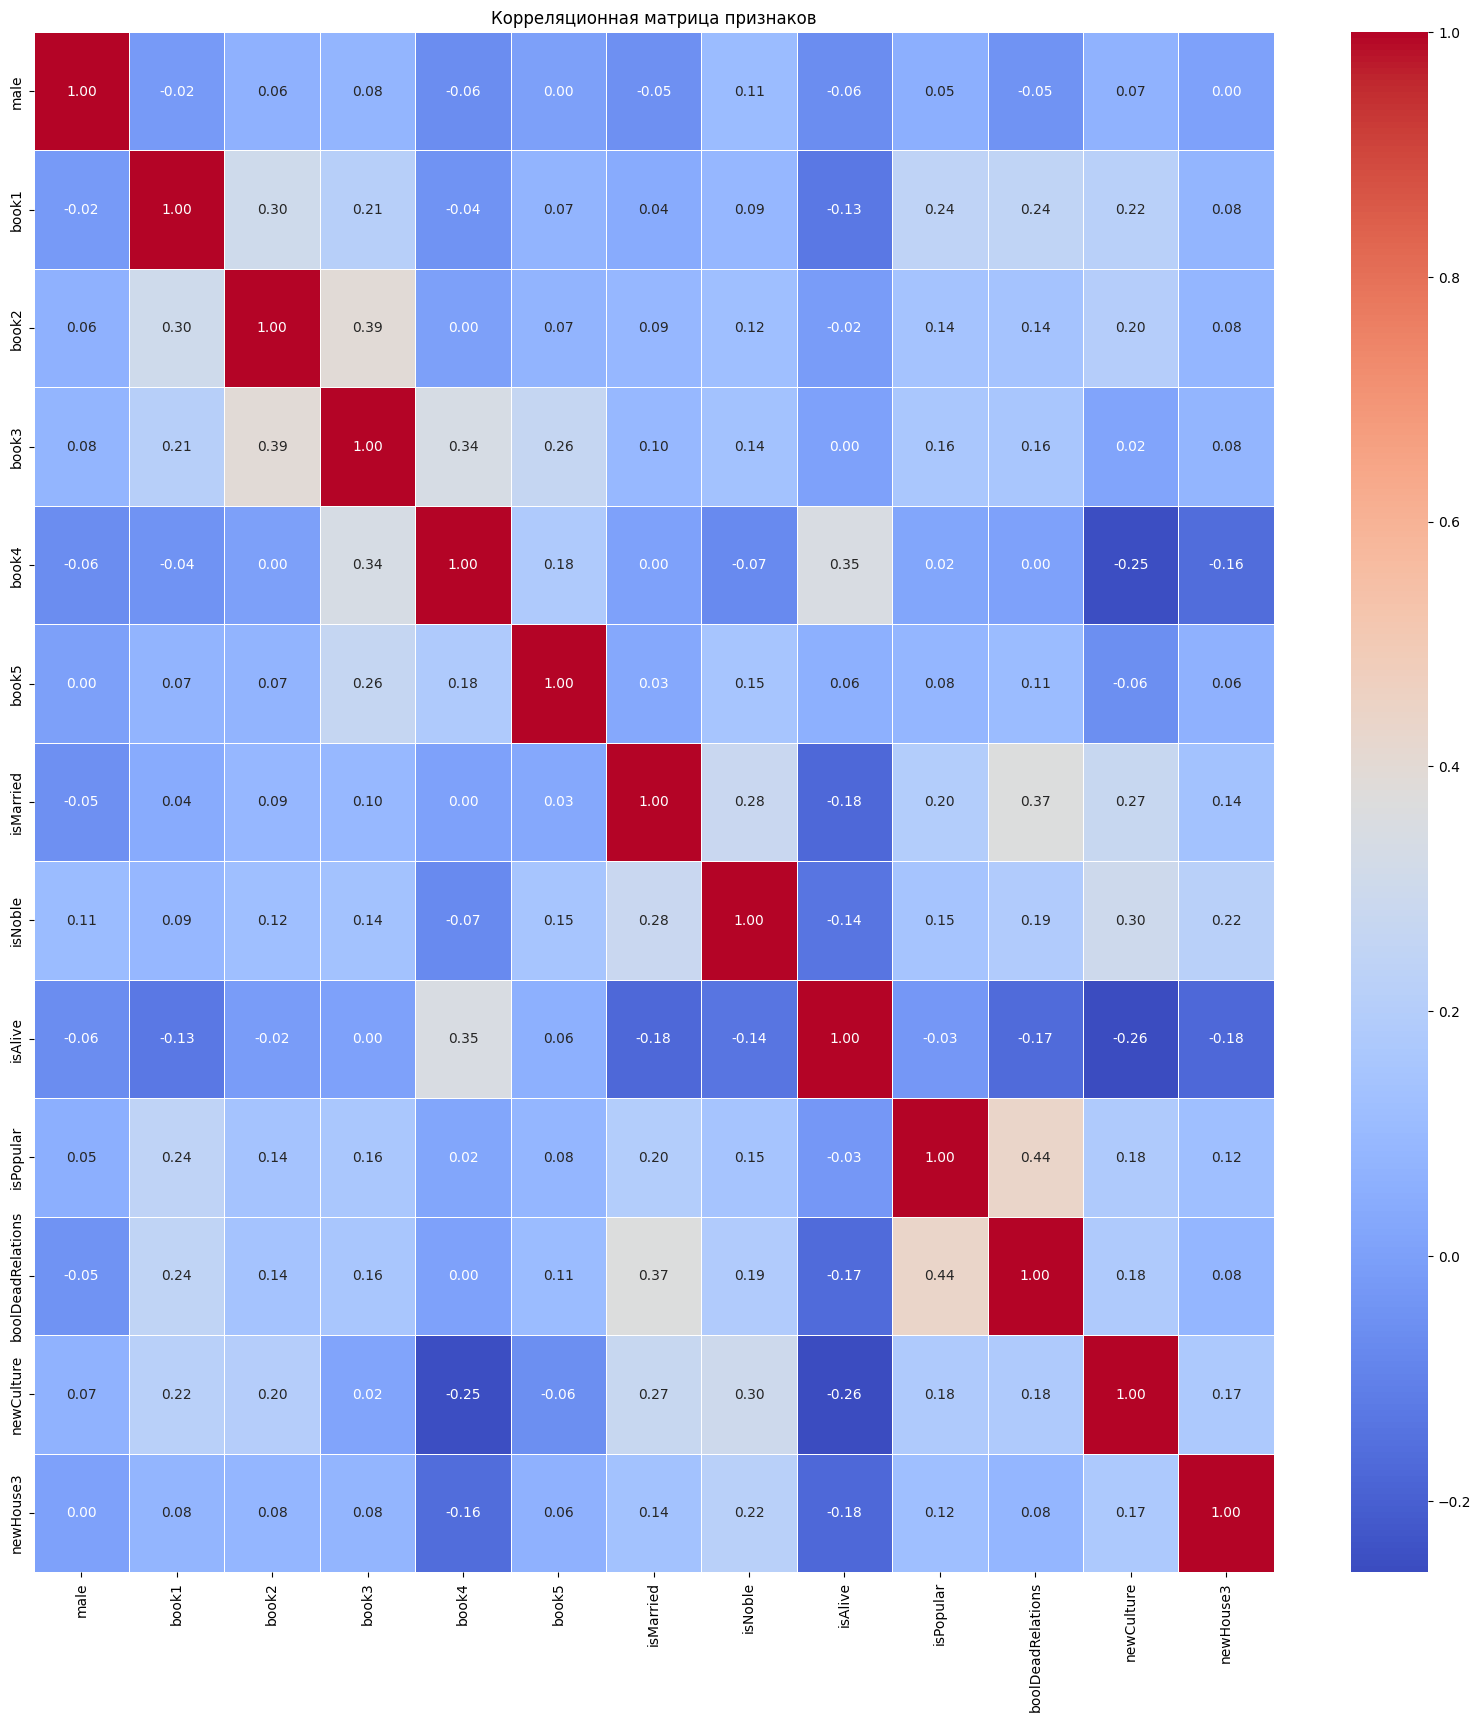

In [ ]:
# матрица корреляций
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()

Матрица корреляции показывает, что признаки слабо коррелируют друг с другом, за исключенеием book2 и book3, но значение корреляции невысокое, поэтому нет смысла удалять признак.


Корреляция признаков с целевой переменной также невелико.

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
# Смотрим является ли переменная сбалансированной
data['isAlive'].value_counts()

,count
isAlive,
1,377
0,111


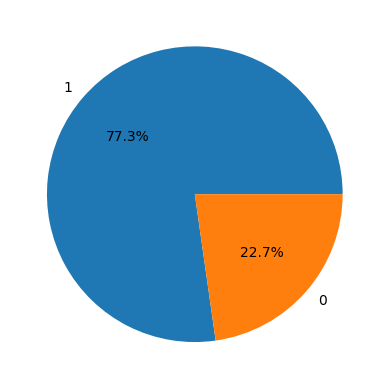

In [ ]:
# визуализируем данные
alive = data['isAlive'].value_counts()
plt.pie(alive.values, labels=alive.index, autopct='%1.1f%%')

plt.show()

Переменная категориальная (2 категории - умер/не умер).

Целевая переменная не сбалансированная, так как выживших в 3 раза больше, чем умерших.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
# данный пункт по случайности был выполнен заранее(

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# как и этот

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

Дополнительно применим масштабирование признаков

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train.mean(axis=0))
print(X_train_scaled.mean(axis=0))

[ 0.62051282  0.16923077  0.28717949  0.28974359  0.52564103  0.43333333
  0.12307692  0.39487179  0.03589744  0.06410256 13.02307692 19.36153846]
[0.62051282 0.16923077 0.28717949 0.28974359 0.52564103 0.43333333
 0.12307692 0.39487179 0.03589744 0.06410256 0.39463869 0.56945701]


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
model = LogisticRegression(C=1)

# Шаг 2. обучение модели
model.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
model1 = AdaBoostClassifier()
model2 = RandomForestClassifier()
model3 = GaussianProcessClassifier()
model4 = GaussianNB()
model5 = KNeighborsClassifier()
model6 = SVC()
model7 = DecisionTreeClassifier()

# Шаг 2. обучение модели
model1.fit(X_train_scaled, y_train)
model2.fit(X_train_scaled, y_train)
model3.fit(X_train_scaled, y_train)
model4.fit(X_train_scaled, y_train)
model5.fit(X_train_scaled, y_train)
model6.fit(X_train_scaled, y_train)
model7.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred1 = model1.predict(X_test_scaled)
y_pred2 = model2.predict(X_test_scaled)
y_pred3 = model3.predict(X_test_scaled)
y_pred4 = model4.predict(X_test_scaled)
y_pred5 = model5.predict(X_test_scaled)
y_pred6 = model6.predict(X_test_scaled)
y_pred7 = model7.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7755


Теперь немного оптимизируем обучение при помощи поиска параметров в GridSearchCV

In [ ]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'max_iter': [50, 100, 200],
    'intercept_scaling': np.arange(1,2,0.5),
    'tol': [0.0001, 0.0005, 0.00005],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
    'C': [0.5, 0.9, 0.7]
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring='accuracy')

gridsearch.fit(X_train_scaled, y_train)

print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

y_pred = gridsearch.best_estimator_.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Точность на тестовых данных: ", accuracy)

{'C': 0.5, 'intercept_scaling': 1.0, 'max_iter': 50, 'solver': 'lbfgs', 'tol': 0.0001}
Точность на тестовых данных:  0.7857142857142857


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy4 = accuracy_score(y_test, y_pred4)
accuracy5 = accuracy_score(y_test, y_pred5)
accuracy6 = accuracy_score(y_test, y_pred6)
accuracy7 = accuracy_score(y_test, y_pred7)

print("Accuracy AdaBoost: %.4f" % accuracy1)
print("Accuracy RandomForest: %.4f" % accuracy2)
print("Accuracy GaussianProcess: %.4f" % accuracy3)
print("Accuracy GaussianNB: %.4f" % accuracy4)
print("Accuracy KNeighborsClassifier: %.4f" % accuracy5)
print("Accuracy SVC: %.4f" % accuracy6)
print("Accuracy DecisionTreeClassifier: %.4f" % accuracy7)

Accuracy AdaBoost: 0.8163
Accuracy RandomForest: 0.8061
Accuracy GaussianProcess: 0.8061
Accuracy GaussianNB: 0.7959
Accuracy KNeighborsClassifier: 0.7653
Accuracy SVC: 0.8265
Accuracy DecisionTreeClassifier: 0.7449


При помощи вариациии параметров попробуем также улучшить все модели

In [ ]:
# Лучшее решение для AdaBoost

param_grid = {
    'n_estimators': [50, 100, 200],  # Количество базовых классификаторов
    'learning_rate': [0.01, 0.1, 1],  # Скорость обучения
}

gridsearch = GridSearchCV(model1, param_grid=param_grid, scoring='accuracy', cv=5)

gridsearch.fit(X_train_scaled, y_train)

best_model = gridsearch.best_estimator_

y_pred = gridsearch.best_estimator_.predict(X_test_scaled)

accuracy1 = accuracy_score(y_test, y_pred)
print("Точность на тестовых данных AdaBoost: ", accuracy1)

# Лучшее решение для RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gridsearch = GridSearchCV(model2, param_grid=param_grid, scoring='accuracy', cv=5)

gridsearch.fit(X_train_scaled, y_train)

best_model = gridsearch.best_estimator_

y_pred = gridsearch.best_estimator_.predict(X_test_scaled)

accuracy2 = accuracy_score(y_test, y_pred)
print("Точность на тестовых данных RandomForest: ", accuracy2)

# Лучшее решение для GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

param_grid = {
    'kernel': [C(1.0) * RBF(length_scale) for length_scale in [1.0, 2.0, 5.0]],
    'max_iter_predict': [100, 200, 300]
}

gridsearch = GridSearchCV(model3, param_grid=param_grid, scoring='accuracy', cv=5)

gridsearch.fit(X_train_scaled, y_train)

best_model = gridsearch.best_estimator_

y_pred = gridsearch.best_estimator_.predict(X_test_scaled)

accuracy3 = accuracy_score(y_test, y_pred)
print("Точность на тестовых данных GaussianProcessClassifier: ", accuracy3)

# Лучшее решение для GaussianNB2
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

gridsearch = GridSearchCV(model4, param_grid=param_grid, scoring='accuracy', cv=5)

gridsearch.fit(X_train_scaled, y_train)

best_model = gridsearch.best_estimator_

y_pred = gridsearch.best_estimator_.predict(X_test_scaled)

accuracy4 = accuracy_score(y_test, y_pred)
print("Точность на тестовых данных GaussianNB2: ", accuracy4)

# Лучшее решение для KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

gridsearch = GridSearchCV(model5, param_grid=param_grid, scoring='accuracy', cv=5)

gridsearch.fit(X_train_scaled, y_train)

best_model = gridsearch.best_estimator_

y_pred = gridsearch.best_estimator_.predict(X_test_scaled)

accuracy5 = accuracy_score(y_test, y_pred)
print("Точность на тестовых данных KNeighborsClassifier: ", accuracy5)

# Лучшее решение для SCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

gridsearch = GridSearchCV(model6, param_grid=param_grid, scoring='accuracy', cv=5)

gridsearch.fit(X_train_scaled, y_train)

best_model = gridsearch.best_estimator_

y_pred = gridsearch.best_estimator_.predict(X_test_scaled)

accuracy6 = accuracy_score(y_test, y_pred)
print("Точность на тестовых данных SCV: ", accuracy6)

# Лучшее решение для DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gridsearch = GridSearchCV(model7, param_grid=param_grid, scoring='accuracy', cv=5)

gridsearch.fit(X_train_scaled, y_train)

best_model = gridsearch.best_estimator_

y_pred = gridsearch.best_estimator_.predict(X_test_scaled)

accuracy7 = accuracy_score(y_test, y_pred)
print("Точность на тестовых данных DecisionTreeClassifier: ", accuracy7)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Точность на тестовых данных AdaBoost:  0.8469387755102041
Точность на тестовых данных RandomForest:  0.8163265306122449
Точность на тестовых данных GaussianProcessClassifier:  0.7959183673469388
Точность на тестовых данных GaussianNB2:  0.7959183673469388
Точность на тестовых данных KNeighborsClassifier:  0.7959183673469388
Точность на тестовых данных SCV:  0.8571428571428571
Точность на тестовых данных DecisionTreeClassifier:  0.826530612244898


array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.1MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
X_test_data = scaler.transform(data)

y_pred = model2.predict(X_test_data)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
submission['isAlive'] = y_pred
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)